In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [45]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_Cas+malt")


File is excel file. Making csv metafile first


In [46]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP306_M6
Cannot find file for VGP307_C3
Cannot find file for VGP402_C1


C:\Users\mko102\GitHub\VGP\src\vgp_helper_fx_spectral.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(snips)


In [47]:
# cell_data['VGP203_C3']['empty_lick_snips_all']

In [48]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [49]:
test= np.mean(cell_data['VGP118_C1']['lick_snips_all'][np.where(cell_data['VGP118_C1']['lick_responsive']==1)],axis=1)

In [50]:
PR_C1_licks_act=[]
PR_C1_licks_inh=[]

PR_C2_licks_act=[]
PR_C2_licks_nonres=[]

PR_C3_licks_act=[]
PR_C3_licks_inhib=[]
PR_C3_licks_nonres=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_C2_licks_act.append(np.mean(lick_snips, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C2_licks_nonres.append(np.mean(snips_non, axis=0))
    
    elif d['diet']=='PR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_C3_licks_act.append(np.mean(lick_snips, axis=0))
        PR_C3_licks_inhib.append(np.mean(snips_in, axis=0))
#         snips_non=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==0)],axis=1)) 
#         PR_C3_licks_nonres.append(np.mean(snips_non, axis=0))

#Filtering out empty arrays        
PR_C2_licks_act_f=[]        
for animal in PR_C2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_C2_licks_act_f.append(animal)
        
PR_C1_licks_inh_f=[]        
for animal in PR_C1_licks_inh: 
    if not np.isnan(animal).any(): 
        PR_C1_licks_inh_f.append(animal)

        
        

PR_Cas=[]
snips_cas=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_Cas.append(np.mean(lick_snips, axis=0))

        
        
        
PR_Cas_f=[]        
for animal in PR_Cas: 
    if not np.isnan(animal).any(): 
        PR_Cas_f.append(animal)
        
        

In [51]:
PR_M1_licks_act=[]
PR_M2_licks_act=[]
PR_M3_licks_act=[]
PR_M3_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='M1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M1_licks_act.append(np.mean(lick_snips, axis=0))
        
    elif d['diet']=='PR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_M2_licks_act.append(np.mean(lick_snips, axis=0))       
    
    elif d['diet']=='PR' and d['session']=='M3':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        lick_snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_M3_licks_act.append(np.mean(lick_snips, axis=0))
        PR_M3_licks_inhib.append(np.mean(lick_snips_in, axis=0))
        
print(animal)
PR_M2_licks_act_f=[]        
for animal in PR_M2_licks_act: 
    if not np.isnan(animal).any(): 
        PR_M2_licks_act_f.append(animal)
        
PR_M3_licks_inhib_f=[]
for animal in PR_M3_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_M3_licks_inhib_f.append(animal)
        
        
        
PR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        PR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
PR_malt_f=[]        
for animal in PR_malt: 
    if not np.isnan(animal).any(): 
        PR_malt_f.append(animal)
        
        


['VGP118', 'VGP203', 'VGP302', 'VGP306', 'VGP307', 'VGP402', 'VGP505', 'VGP506', 'VGP509']


C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [52]:
NR_C1_licks_act=[]
NR_C2_licks_act=[]
NR_C3_licks_act=[]

animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C1_licks_act.append(np.mean(lick_snips, axis=0))

        
    elif d['diet']=='NR' and d['session']=='C2':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C2_licks_act.append(np.mean(lick_snips, axis=0))

    
    elif d['diet']=='NR' and d['session']=='C3':
        animal.append(d['animal'])
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_C3_licks_act.append(np.mean(lick_snips, axis=0))




NR_C3_licks_act_f=[]        
for animal in NR_C3_licks_act: 
    if not np.isnan(animal).any(): 
        NR_C3_licks_act_f.append(animal)
        
        
NR_cas=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Cas':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_cas.append(np.mean(lick_snips, axis=0))
        
        
        
NR_cas_f=[]        
for animal in NR_cas: 
    if not np.isnan(animal).any(): 
        NR_cas_f.append(animal)


In [53]:
NR_M1_licks_act=[]
NR_M2_licks_act=[]
NR_M3_licks_act=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='M1':
        lick_snips1=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M1_licks_act.append(np.mean(lick_snips1, axis=0))
        
    elif d['diet']=='NR' and d['session']=='M2':
        animal.append(d['animal'])
        lick_snips2=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M2_licks_act.append(np.mean(lick_snips2, axis=0))

    elif d['diet']=='NR' and d['session']=='M3':
        animal.append(d['animal'])
        lick_snips3=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_M3_licks_act.append(np.mean(lick_snips3, axis=0))

        
NR_malt=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['solution']=='Malt':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        NR_malt.append(np.mean(lick_snips, axis=0))
        
        
        
NR_malt_f=[]        
for animal in NR_malt: 
    if not np.isnan(animal).any(): 
        NR_malt_f.append(animal)


Text(0.5, 1.0, 'Maltodextrin')

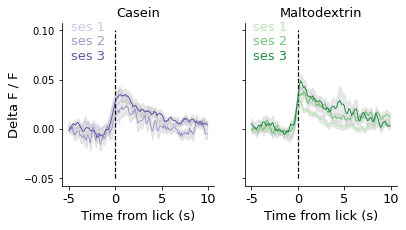

In [54]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], PR_C1_licks_act, linecolor="#cbc9e2")
# tp.shadedError(ax[0], PR_C1_licks_inh_f, linecolor="black")


tp.shadedError(ax[0], PR_C2_licks_act_f, linecolor="#9e9ac8")

tp.shadedError(ax[0], PR_C3_licks_act, linecolor="#6a51a3")



tp.shadedError(ax[1], PR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], PR_M2_licks_act_f, linecolor="#74c476")

tp.shadedError(ax[1], PR_M3_licks_act, linecolor="#238b45")




ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)



# f.savefig("..//output//PR_licksnips_casmalt.png")


Text(0.5, 1.0, 'Maltodextrin')

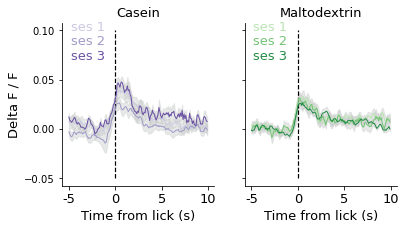

In [55]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)

tp.shadedError(ax[0], NR_C1_licks_act, linecolor="#cbc9e2")

tp.shadedError(ax[0], NR_C2_licks_act, linecolor="#9e9ac8")

tp.shadedError(ax[0], NR_C3_licks_act_f, linecolor="#6a51a3")



tp.shadedError(ax[1], NR_M1_licks_act, linecolor="#bae4b3")

tp.shadedError(ax[1], NR_M2_licks_act, linecolor="#74c476")

tp.shadedError(ax[1], NR_M3_licks_act, linecolor="#238b45")






ax[0].text(2, 0.1, "ses 1",color='#cbc9e2', size=13)
ax[0].text(2, 0.085, "ses 2", color="#9e9ac8",size=13)
ax[0].text(2, 0.07, "ses 3", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "ses 1",color='#bae4b3', size=13)
ax[1].text(2, 0.085, "ses 2", color="#74c476",size=13)
ax[1].text(2, 0.07, "ses 3", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)


# f.savefig("..//output//NR_licksnips_casmalt.png")

### making heatmap of all cells 

In [56]:
from itertools import chain

snips_PR_cas=[]
act_PR_cas=[]
in_PR_cas=[]
empty_PR_cas=[]

snips_PR_malt=[]
act_PR_malt=[]
in_PR_malt=[]
empty_PR_malt=[]


snips_NR_cas=[]
act_NR_cas=[]
in_NR_cas=[]

snips_NR_malt=[]
act_NR_malt=[]
in_NR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])

        for cell in snips:
            snips_PR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_PR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='C3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='M3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_malt.append(np.mean(cell, axis=0))

            
#Filtering out nan values. need to figure out why there's one cell with nan values... 
empty_PR_malt_f=[]        
for cell in empty_PR_malt: 
    if not np.isnan(cell).any(): 
        empty_PR_malt_f.append(cell)
        
        



C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [57]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

Text(13.075000000000003, 0.5, 'Cell #')

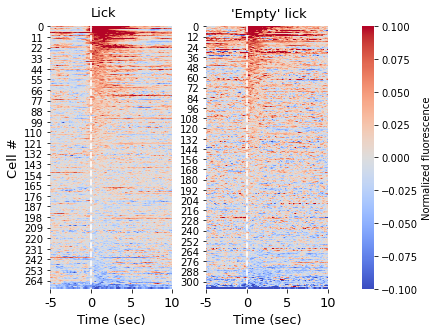

In [58]:
f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1=sort_by_activity(snips_PR_cas,50,70)
y2=sort_by_activity(snips_PR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(50,-10, "Lick", size=13)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(30,-10, "'Empty' lick", size=13)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


# f.savefig("..//output//heatmap_empty_PR_Cas.png")

In [59]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

In [60]:
#sorting by activity - PR cas activated
PR_act_cas=sort_by_activity(act_PR_cas,50,70)
PR_in_cas=sort_by_activity(in_PR_cas,50,70)
PR_cas_empty=sort_by_activity(empty_PR_cas,50,70)


NR_act_cas=sort_by_activity(act_NR_cas,50,70)
NR_in_cas=sort_by_activity(in_NR_cas,50,70)




PR_act_malt=sort_by_activity(act_PR_malt,50,70)
PR_in_malt=sort_by_activity(in_PR_malt,50,70)


NR_act_malt=sort_by_activity(act_NR_malt,50,70)
NR_in_malt=sort_by_activity(in_NR_malt,50,70)


## Heatmaps all cells NR and PR

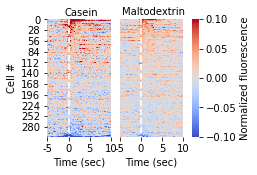

In [61]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_cas,50,70)

y2 = sort_by_activity(snips_NR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_NR.png")

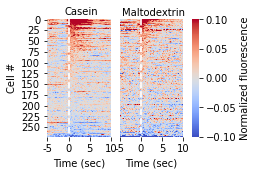

In [62]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PR_cas,50,70)

y2 = sort_by_activity(snips_PR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_PR.png")

## Signal fig NR and PR 

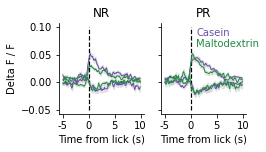

In [63]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NR_cas, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NR_cas, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NR_malt, linecolor="#238b45")
tp.shadedError(ax[0], in_NR_malt, linecolor="#238b45")


tp.shadedError(ax[1], act_PR_cas, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PR_cas, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PR_malt, linecolor="#238b45")
tp.shadedError(ax[1], in_PR_malt, linecolor="#238b45")




ax[1].text(60, 0.085, "Casein",color='#6a51a3')
ax[1].text(60, 0.065, "Maltodextrin", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NR')
ax[1].set_title('PR')


f.savefig("..//output//Singal_Cas-malt1.png")

Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

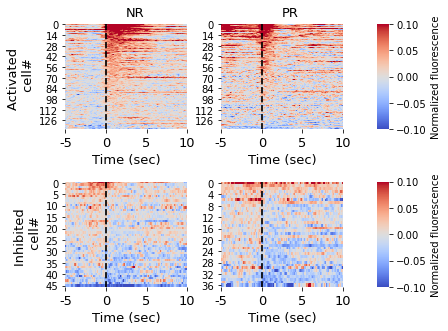

In [64]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = PR_act_malt
y2= NR_act_malt
y3 = PR_in_malt
y4 = NR_in_cas

sns.heatmap(PR_act_cas, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(PR_cas_empty, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y4, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y3, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NR", size=13)

ax[0][1].text(75,-10, "PR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)


# f.savefig("..//output//heatmap_allcells_empty.png")

## Pie Charts

In [65]:
cols = ["data", "cas", "malt"]
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['cas']=len(act_PR_cas),len(in_PR_cas),len(snips_PR_cas)-(len(act_PR_cas)+len(in_PR_cas))
df_resp_PR['malt']=len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))

df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['cas_pct'] = df_resp_PR['cas'] / df_resp_PR['cas'].sum() * 100
df_resp_PR['malt_pct'] = df_resp_PR['malt'] / df_resp_PR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PR.set_index('data', inplace=True)
# df_resp_PR = df_resp_PR.T


df_resp_PR

,data,cas,malt,cas_pct,malt_pct
0,lick_activated,138,108,50.549451,34.951456
1,lick_inhibited,48,37,17.582418,11.974110
2,non-responsive,87,164,31.868132,53.074434


In [66]:
cols = ["data", "cas", 'malt']
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['cas']=len(act_NR_cas),len(in_NR_cas),len(snips_NR_cas)-(len(act_NR_cas)+len(in_NR_cas))
df_resp_NR['malt']=len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['cas_pct'] = df_resp_NR['cas'] / df_resp_NR['cas'].sum() * 100
df_resp_NR['malt_pct'] = df_resp_NR['malt'] / df_resp_NR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NR.set_index('data', inplace=True)
# df_resp_NR = df_resp_NR.T

df_resp_NR

,data,cas,malt,cas_pct,malt_pct
0,lick_activated,84,106,27.45098,37.722420
1,lick_inhibited,46,41,15.03268,14.590747
2,non-responsive,176,134,57.51634,47.686833


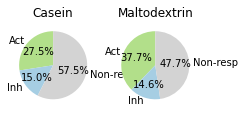

In [67]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-malt_NR.png")




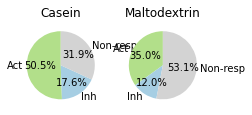

In [68]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_PR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-malt_PR.png")

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

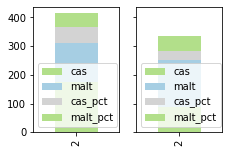

In [69]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt'], rotation=0)
    
ax[1].set_title('PR')
ax[0].set_title('NR')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.3))





f.savefig("..//output//Stack_Cas-malt1.png")

In [70]:
# cols = ["data", "Cas", 'Malt']
# df_resp_PR = pd.DataFrame(columns=cols)
# df_resp_PR['Cas']=len(PR_act_cas),len(PR_in_cas),len(snips_PR_cas)-(len(PR_act_cas)+len(PR_in_cas))
# df_resp_PR['Malt']=len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))
# df_resp_PR['Cas_pct'] = df_resp_PR['Cas'] / df_resp_PR['Cas'].sum() * 100
# df_resp_PR['Malt_pct'] = df_resp_PR['Malt'] / df_resp_PR['Malt'].sum() * 100
# df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'


# # # Transpose the DataFrame
# df_resp_PR.set_index('data', inplace=True)
# df_resp_PR = df_resp_PR.T

# df_resp_PR

In [71]:
# cols = ["data", "Cas", 'Malt']
# df_resp_NR = pd.DataFrame(columns=cols)
# df_resp_NR['Cas']=len(NR_act_cas),len(NR_in_cas),len(snips_NR_cas)-(len(NR_act_cas)+len(NR_in_cas))
# df_resp_NR['Malt']=len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))
# df_resp_NR['Cas_pct'] = df_resp_NR['Cas'] / df_resp_NR['Cas'].sum() * 100
# df_resp_NR['Malt_pct'] = df_resp_NR['Malt'] / df_resp_NR['Malt'].sum() * 100

# df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'


# # # Transpose the DataFrame
# df_resp_NR.set_index('data', inplace=True)
# df_resp_NR = df_resp_NR.T



In [72]:

# f, ax = plt.subplots(figsize=(5, 4), ncols=2)
# colors=['#b2df8a','#a6cee3','lightgrey']

# df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

# df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

# for axis in ax:
#     for p in axis.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
#         axis.set_xticklabels(['Cas', 'Malt'])
    
# ax[1].set_title('PR')
# ax[0].set_title('NR')
# ax[0].set_yticks([0,20,40,60,80,100])
# ax[0].set_yticklabels([0,20,40,60,80,100])
# ax[1].set_yticklabels([])


# f.savefig("..//output//Stack.png")

# NRPR and PRNR

In [77]:
from itertools import chain

snips_PRNR_cas=[]
act_PRNR_cas=[]
in_PRNR_cas=[]
empty_PRNR_cas=[]

snips_PRNR_malt=[]
act_PRNR_malt=[]
in_PRNR_malt=[]
empty_PRNR_malt=[]


snips_NRPR_cas=[]
act_NRPR_cas=[]
in_NRPR_cas=[]
empty_NRPR_cas=[]

snips_NRPR_malt=[]
act_NRPR_malt=[]
in_NRPR_malt=[]
empty_NRPR_malt=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='C6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all'][np.where(d['lick_responsive']==1)]
        animal.append(d['animal'])


        for cell in snips:
            snips_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_cas.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_cas.append(np.mean(cell, axis=0))
            
            
    elif d['diet']=='PRNR' and d['session']=='M6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        empty_licks=d['empty_lick_snips_all']

        for cell in snips:
            snips_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_malt.append(np.mean(cell, axis=0))
        for cell in empty_licks:
            empty_PRNR_malt.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='C6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_cas.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_cas.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='M6':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_malt.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_malt.append(np.mean(cell, axis=0))

            
# #Filtering out nan values. need to figure out why there's one cell with nan values... 
# empty_PR_malt_f=[]        
# for cell in empty_PR_malt: 
#     if not np.isnan(cell).any(): 
#         empty_PR_malt_f.append(cell)
        
        

animal

['VGP118',
 'VGP203',
 'VGP302',
 'VGP306',
 'VGP307',
 'VGP402',
 'VGP505',
 'VGP506',
 'VGP509']

## heatmaps

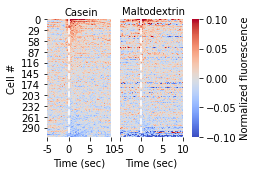

In [78]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NRPR_cas,50,70)

y2 = sort_by_activity(snips_NRPR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_NRPR.png")

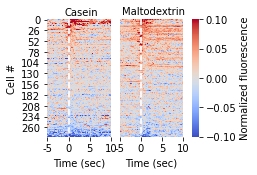

In [79]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PRNR_cas,50,70)

y2 = sort_by_activity(snips_PRNR_malt,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(40,-10, "Casein")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(5,-10, "Maltodextrin")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

# ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_cas-malt_PRNR.png")

Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

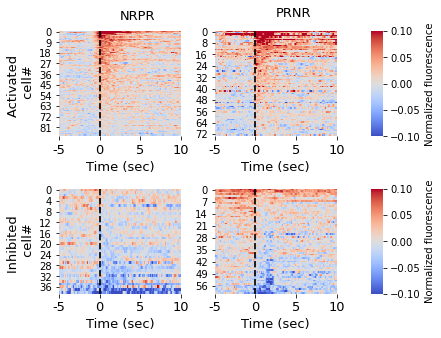

In [80]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = sort_by_activity(act_NRPR_cas,50,70)
y2= sort_by_activity(act_PRNR_cas,50,70)
y3 = sort_by_activity(in_NRPR_malt,50,70)
y4 = sort_by_activity(in_PRNR_malt,50,70)

sns.heatmap(y1, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y3, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y4, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NRPR", size=13)

ax[0][1].text(75,-10, "PRNR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)




## Signal

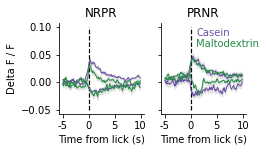

In [81]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)



tp.shadedError(ax[0], act_NRPR_cas, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NRPR_cas, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NRPR_malt, linecolor="#238b45")
tp.shadedError(ax[0], in_NRPR_malt, linecolor="#238b45")


tp.shadedError(ax[1], act_PRNR_cas, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PRNR_cas, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PRNR_malt, linecolor="#238b45")
tp.shadedError(ax[1], in_PRNR_malt, linecolor="#238b45")




ax[1].text(60, 0.085, "Casein",color='#6a51a3')
ax[1].text(60, 0.065, "Maltodextrin", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NRPR')
ax[1].set_title('PRNR')


f.savefig("..//output//Singal_Cas-malt2.png")

## Pie Chars

In [82]:
cols = ["data", "cas", 'malt']
df_resp_PRNR = pd.DataFrame(columns=cols)
df_resp_PRNR['cas']=len(act_PRNR_cas),len(in_PRNR_cas),len(snips_PRNR_cas)-(len(act_PRNR_cas)+len(in_PRNR_cas))
df_resp_PRNR['malt']=len(act_PRNR_malt),len(in_PRNR_malt),len(snips_PRNR_malt)-(len(act_PRNR_malt)+len(in_PRNR_malt))

df_resp_PRNR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PRNR['cas_pct_2'] = df_resp_PRNR['cas'] / df_resp_PRNR['cas'].sum() * 100
df_resp_PRNR['malt_pct_2'] = df_resp_PRNR['malt'] / df_resp_PRNR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PRNR.set_index('data', inplace=True)
# df_resp_PRNR = df_resp_PRNR.T

df_resp_PRNR

,data,cas,malt,cas_pct_2,malt_pct_2
0,lick_activated,74,57,26.148410,23.170732
1,lick_inhibited,57,61,20.141343,24.796748
2,non-responsive,152,128,53.710247,52.032520


In [83]:
cols = ["data", "cas", 'malt']
df_resp_NRPR = pd.DataFrame(columns=cols)
df_resp_NRPR['cas']=len(act_NRPR_cas),len(in_NRPR_cas),len(snips_NRPR_cas)-(len(act_NRPR_cas)+len(in_NRPR_cas))
df_resp_NRPR['malt']=len(act_NRPR_malt),len(in_NRPR_malt),len(snips_NRPR_malt)-(len(act_NRPR_malt)+len(in_NRPR_malt))

df_resp_NRPR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NRPR['cas_pct_2'] = df_resp_NRPR['cas'] / df_resp_NRPR['cas'].sum() * 100
df_resp_NRPR['malt_pct_2'] = df_resp_NRPR['malt'] / df_resp_NRPR['malt'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NRPR.set_index('data', inplace=True)
# df_resp_NRPR= df_resp_NRPR.T

df_resp_NRPR

,data,cas,malt,cas_pct_2,malt_pct_2
0,lick_activated,89,58,28.253968,23.673469
1,lick_inhibited,76,39,24.126984,15.918367
2,non-responsive,150,148,47.619048,60.408163


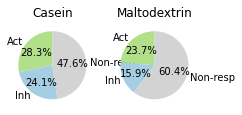

In [84]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NRPR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NRPR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-mal_NRPR.png")

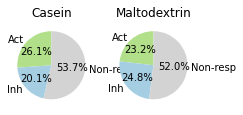

In [85]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_PRNR.cas[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PRNR.malt[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein" )
ax2.set_title("Maltodextrin")

f.savefig("..//output//Pie_cas-mal_PRNR.png")

In [86]:
cols = ["data", "cas", "malt"]

df_merged_PR = pd.concat([df_resp_PR, df_resp_PRNR], ignore_index=True)

# # Transpose the DataFrame
df_merged_PR.set_index('data', inplace=True)
df_merged_PR = df_merged_PR.T



In [87]:
cols = ["data", "cas", 'malt']

df_merged_NR = pd.concat([df_resp_NR, df_resp_NRPR], ignore_index=True)

# # Transpose the DataFrame
df_merged_NR.set_index('data', inplace=True)
df_merged_NR = df_merged_NR.T



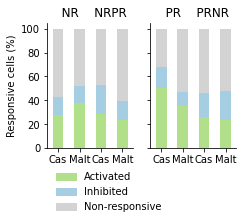

In [88]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_merged_NR[2:6].plot(kind='bar', stacked=True, ax=ax[0], color=colors)


df_merged_PR[2:6].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt', 'Cas', 'Malt'], rotation=0)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)

    
ax[1].set_title('   PR    PRNR ')
ax[0].set_title('   NR    NRPR ')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.35))


ax[0].spines["top"].set_visible(False)

f.savefig("..//output//Stack_cas-malt_diet2.png")

### Proportions activated cells per animal

In [89]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])


In [101]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"C3": "float", "M3": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
             .assign(pref1=lambda df_: df_.C3 - df_.M3)
           .assign(pref2=lambda df_: df_.C6 - df_.M6)

           
          )



In [103]:
df_pref

session             C1         C2         C3         C4         C5         C6  \
animal diet                                                                     
VGP118 PR    66.666667  53.846154  46.153846        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  57.894737  86.666667  38.888889   
VGP202 NR    60.465116  69.230769  40.909091        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  65.517241  47.619048  45.238095   
VGP203 PR    54.545455  33.333333  62.500000        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  41.935484  65.000000  46.341463   
VGP204 NR    40.740741  43.750000  40.000000        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  31.250000  36.666667  50.000000   
VGP302 PR    66.000000  76.119403  79.452055        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  71.428571        NaN  68.333333   
VGP306 PR    55.555556  46.153846  60.000000        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  65.217391        NaN  25.000000   
VGP307 PR    33.333333  35.714286        NaN        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  33.333333        NaN   6.250000   
VGP310 NR    61.538462  41.666667  52.380952        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  44.000000        NaN  70.000000   
VGP402 PR          NaN  25.000000  48.000000        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  37.209302  63.333333  23.529412   
VGP403 NR    70.000000  40.000000  61.538462        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN        NaN  34.482759  61.764706   
VGP404 NR    64.583333  48.000000  33.333333        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  48.648649  26.315789  52.631579   
VGP501 NR    52.173913  54.761905  31.707317        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  74.074074  75.757576  78.787879   
VGP502 NR    57.777778  46.666667  30.555556        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  54.545455  35.294118  26.190476   
VGP503 NR    50.000000  46.875000  39.473684        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  35.714286  35.294118  31.250000   
VGP504 NR    61.818182  58.695652  45.454545        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  57.446809  66.666667  50.000000   
VGP505 PR    61.111111  50.000000  85.454545        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  74.603175  36.842105  66.666667   
VGP506 PR    31.250000  61.111111  65.000000        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  53.571429  46.153846  45.833333   
VGP509 PR    63.636364  34.482759  51.428571        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  56.097561  57.692308  47.826087   

session             M1         M2         M3         M4         M5         M6  \
animal diet                                                                     
VGP118 PR    62.500000  55.000000  38.888889        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  35.294118  46.153846  38.888889   
VGP202 NR    55.555556  50.000000  54.545455        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  29.310345  32.352941  34.375000   
VGP203 PR    40.000000  63.414634  37.931034        NaN        NaN        NaN   
       PRNR        NaN        NaN        NaN  36.363636  53.125000  52.380952   
VGP204 NR    47.368421  33.333333        NaN        NaN        NaN        NaN   
       NRPR        NaN        NaN        NaN  40.000000  38.709677  21.428571   
VGP302 PR    54.000000  72.289157  61.904762        NaN        NaN        NaN   
       PRNR        NaN        

In [120]:
# Making dataframe for NR-NRPR group
df_NR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M3")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C6")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

df_NRPR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M6")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)

df_PR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M3")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="C6")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)


df_PRNR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="M6")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


NR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    
PR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)

    
NRPR_cas=[]
for row in df_NRPR_cas.iterrows():
    NRPR_cas.append(row[1].NRPR)
    
PRNR_cas=[]
for row in df_PRNR_cas.iterrows():
    PRNR_cas.append(row[1].PRNR)

    
NR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    
PR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)

    
NRPR_malt=[]
for row in df_NRPR_malt.iterrows():
    NRPR_malt.append(row[1].NRPR)
    
PRNR_malt=[]
for row in df_PRNR_malt.iterrows():
    PRNR_malt.append(row[1].PRNR)
        
    


Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.
Could not space all sets of points.


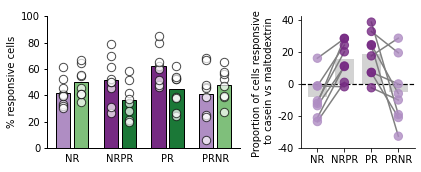

In [142]:
f, ax = plt.subplots(figsize=(6,2.5),ncols=2, sharey=False,gridspec_kw={"width_ratios": [1.7,1]})
f.subplots_adjust(wspace=0.4,hspace=0.2, bottom=0.15, left=0.1, right=0.95)

colors_C=['#af8dc3', '#7fbf7b','#762a83','#1b7837','#762a83','#1b7837','#af8dc3','#7fbf7b']


tp.barscatter([[NR_cas,NR_malt],[NRPR_cas,NRPR_malt],[PR_cas,PR_malt],[PRNR_cas,PRNR_malt]], 
#               paired= True,
              barfacecolor=colors_C,
              grouplabel=['NR','NRPR', 'PR','PRNR'],
              barlabeloffset=0.04,
              barfacecolor_option='individual',
              fontsize = 10,
              scattersize=70,
              scatteralpha=0.7,
              spaced=True,
              linewidth=1,
              ax=ax[0])

ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_ylabel("% responsive cells")


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax[1].plot(x1, y, color="grey")
    ax[1].scatter(x1, y, s=70, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax[1].plot(x2, y, color="grey")
    ax[1].scatter(x2, y, s=70, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax[1].bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax[1].bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax[1].set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin")
ax[1].set_yticks([-40,-20,0,20,40])
ax[1].set_yticklabels(['-40','-20','0','20','40'])

ax[1].set_xticks([1,2,3,4])
ax[1].set_xticklabels(["NR", 'NRPR','PR','PRNR'])
ax[1].set_xlim([0.4,4.6])

ax[1].axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\proportion_cells_cas-malt.png')

## Perference 

In [136]:
# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    
    


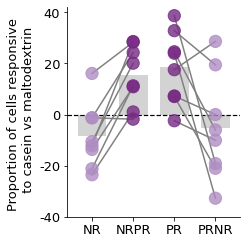

In [106]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

## Proportion of cells responsive to Cas/malt

In [97]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



AttributeError: 'DataFrame' object has no attribute 'PRNR'

In [ ]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





In [ ]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?